Module 4 Project : anjana-04-Jupyter


Purpose: Project 4 uses a combination of Python and Markdown to create an initial data story in a Jupyter Notebook. The project includes a project virtual environment with popular libraries for data analytics including pandas, matplotlib, and seaborn, and introduces a common process for starting exploratory data analysis projects. 

Objective:
Develop a Jupyter Notebook that demonstrates skills with Jupyter and guided exploratory data analysis.

Imorts:
The following code provides the imports for the project.


In [ ]:
#importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Step 1.  Data Acquisition
Use the Iris dataset available in the Seaborn library. The Iris dataset is a well-known dataset in data science and machine learning, often used for various classification tasks and basic data exploration. Load the data into a pandas DataFrame. Use the pd read functions such as pd.read_csv() or pd.read_excel() as appropriate. To read from the Seaborn dataset, we'll use sns.load_dataset() function and pass in the 'iris' (the name without .csv) to populate our DataFrame.

In [11]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Step 2. Initial Data Inspection
Display the first 10 rows of the DataFrame, check the shape, and display the data types of each column using df.head(10), df.shape, and df.dtypes.

In [12]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Step 3. Initial Descriptive Statistics
Use the DataFrame describe() method to display summary statistics for each column.

In [13]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Step 4. Initial Data Distribution for Numerical Columns
Choose a numerical column and use df['column_name'].hist() to plot a histogram for that specific column. To show all the histograms for all numerical columns, use df.hist().

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>],
       [<Axes: title={'center': 'petal_length_in'}>,
        <Axes: title={'center': 'petal_width_in'}>]], dtype=object)

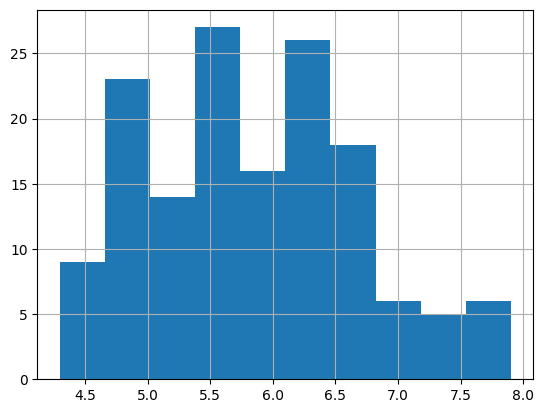

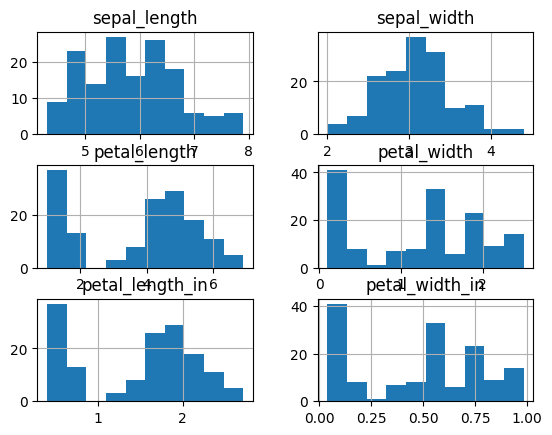

In [40]:
# Inspect histogram by numerical column
df['sepal_length'].hist()

# Inspect histograms for all numerical columns
df.hist()



Modifying the data:
This renames the species column to plant_Species to better understand the column information. It then modifies the values, converting presumed cm to inches. It then prints the head to show that they have been added.

In [25]:
# Renaming a column
df.rename(columns={'species': 'plant_Species'}, inplace=True)

# Adding a new column
df['petal_length_in'] = df['petal_length'] / 2.54
df['petal_width_in'] = df['petal_width'] / 2.54

#print the head and new column values
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width plant_Species  \
0           5.1          3.5           1.4          0.2        setosa   
1           4.9          3.0           1.4          0.2        setosa   
2           4.7          3.2           1.3          0.2        setosa   
3           4.6          3.1           1.5          0.2        setosa   
4           5.0          3.6           1.4          0.2        setosa   

   petal_length_in  petal_width_in  
0         0.551181         0.07874  
1         0.551181         0.07874  
2         0.511811         0.07874  
3         0.590551         0.07874  
4         0.551181         0.07874  


Creating scatterplot to represent species treds:
This creates a scatter plot where the x value is the petal lenght, the y value is petal width and the hue or key is the plant_Species and pallete is used to choose color for different pant species. The code then modifies the x and y axis labels and the title of the plot. Data is shown in inches

Text(0.5, 1.0, 'Petal Length vs. Petal Width')

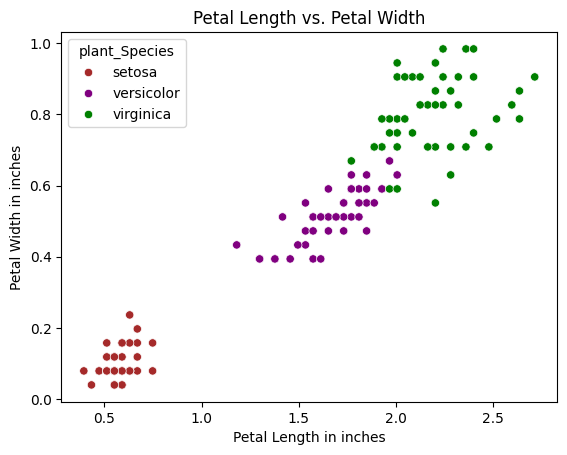

In [38]:

plt = sns.scatterplot(data=df, x="petal_length_in", y="petal_width_in", hue="plant_Species", palette = {'setosa': 'brown', 'versicolor': 'purple', 'virginica': 'green'})

# Set axis labels and chart title
plt.set_xlabel("Petal Length in inches")
plt.set_ylabel("Petal Width in inches")
plt.set_title("Petal Length vs. Petal Width")

# Show the plot (This actually causes an error)
#plt.show()